# [Surprise](https://surpriselib.com/)
- 파이썬 기반의 추천 시스템 구축을 위한 전용 패키지 중 하나인 Surprise는 파이썬 기반에서 사이킷런과 유사한 API와 프레임워크를 제공하여, 추천 시스템의 전반적인 알고리즘을 이해하고 사이킷런 사용경험이 있으면 쉽게 사용할 수 있습니다.   

- Surprise는 사용자 아이디, 아이템 아이디, 평점 데이터가 로우 레벨로 된 데이터 세트만 적용할 수 있다. 그래서 데이터의 첫번재 컴럼을 사용자 아이디, 두번째 컬럼을 아이템 아이디, 세번째 컬럼을 평점으로 가정해 데이터를 로딩하고 네번째 컬럼부터는 로딩을 수행하지 않는다.

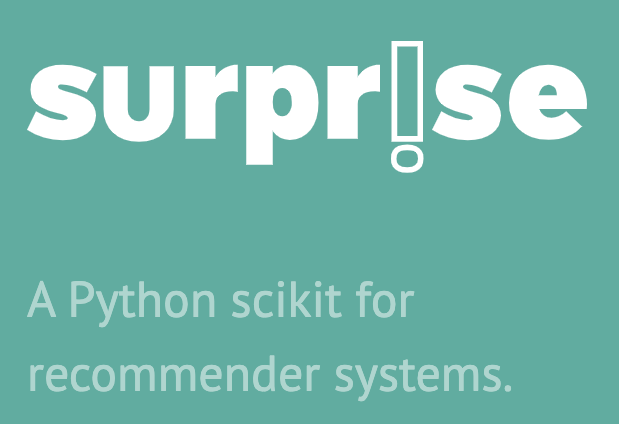

## [내장 데이터셋](https://surprise.readthedocs.io/en/stable/dataset.html)
- 영화 평가 데이터셋  
`ml-100k`, `ml-1m`

## [알고리즘](https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html)
- BaselineOnly  
사용자 bias(편향성)와 아이템 bias(편향성)를 고려한 SGD 베이스라인 알고리즘
- KNNWithMeans  
사용자의 평가 경향까지 고려한 KNN 알고리즘
- SVD  
행렬 분해를 통한 잠재요인 협업 필터링을 위한 SVD 알고리즘
- SVDpp  
사용자의 특정 아이템에 대한 평가 여부를 이진값으로 암묵적 평가를 고려한 SVD 알고리즘

# 설치

In [1]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3193651 sha256=ada3c3fffc928dc249d6be46d491eddbc9c14c4a3262fc12653b7819f2e03a19
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


# 데이터셋

In [2]:
# Dataset 관련 모듈을 가져온다.
from surprise import Dataset, Reader

# Train/test set분리 관련 모듈을 가져온다.
from surprise.model_selection import train_test_split

import numpy as np
import pandas as pd 

In [3]:
# MovieLens 100K 데이터 불러오기
data = Dataset.load_builtin(name=u'ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


데이터 확인

In [4]:
data.raw_ratings[:10]

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596'),
 ('298', '474', 4.0, '884182806'),
 ('115', '265', 2.0, '881171488'),
 ('253', '465', 5.0, '891628467'),
 ('305', '451', 3.0, '886324817'),
 ('6', '86', 3.0, '883603013')]

다운로드 파일 위치 확인

In [5]:
data.ratings_file

'/root/.surprise_data/ml-100k/ml-100k/u.data'

## Pandas DataFrame

In [6]:
ratings = pd.read_csv(data.ratings_file, sep="\t", header=None) 
ratings.columns = ['user', 'item', 'rating', 'datetime']
ratings.head()

,user,item,rating,datetime
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


## EDA

In [7]:
# 결과를 그래프로 표시하기 위한 라이브러리
import matplotlib.pyplot as plt

plt.ion();

In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user      100000 non-null  int64
 1   item      100000 non-null  int64
 2   rating    100000 non-null  int64
 3   datetime  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [9]:
ratings.isnull().sum().sum()

0

In [10]:
ratings_groupby = ratings.groupby(['item'])['rating'].agg({'mean', 'count', 'min', 'max'}).sort_values(by=['count', 'mean'], ascending=False)

ratings_groupby.head()

,min,mean,max,count
item,,,,
50,1,4.358491,5,583
258,1,3.803536,5,509
100,1,4.155512,5,508
181,1,4.007890,5,507
294,1,3.156701,5,485


In [ ]:
ratings.describe()

,user,item,rating,datetime
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


## Reader

In [11]:
from surprise import Reader 

In [12]:
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))

In [13]:
reader

## 데이터셋 분리

In [14]:
# Train/Test 0.75 : 0.25로 분리
trainset, testset = train_test_split(data, test_size = 0.25)

# SVD 모델 학습

In [15]:
from surprise import SVD

# 정확도 측정 관련 모듈을 가져온다.
from surprise import accuracy

In [16]:
SEED = 42
svd = SVD(n_factors=50, random_state=SEED)
svd.fit(trainset)

predictions = svd.test( testset )

accuracy.rmse(predictions)

RMSE: 0.9339


0.9338737481698136

## Cross Validate

In [17]:
from surprise.model_selection import cross_validate

In [18]:
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9284  0.9360  0.9361  0.9381  0.9308  0.9339  0.0037  
MAE (testset)     0.7332  0.7370  0.7365  0.7408  0.7326  0.7360  0.0029  
Fit time          1.10    1.10    1.09    1.08    1.08    1.09    0.01    
Test time         0.23    0.30    0.14    0.28    0.22    0.23    0.05    


{'test_rmse': array([0.92837689, 0.9359563 , 0.93606862, 0.93809974, 0.93079051]),
 'test_mae': array([0.73320297, 0.73700644, 0.73646572, 0.74079062, 0.73260927]),
 'fit_time': (1.1002163887023926,
  1.0982835292816162,
  1.0932528972625732,
  1.0753381252288818,
  1.0783147811889648),
 'test_time': (0.22530889511108398,
  0.29596543312072754,
  0.1428992748260498,
  0.28328776359558105,
  0.22230172157287598)}

## Hyper Parameters

In [19]:
from surprise.model_selection import GridSearchCV

In [20]:
# n_epochs: SGD 수행 시 반복 횟수, n_factors: 잠재 요인 크기
param_grid = {
    'n_epochs': [20, 40, 60], 
    'n_factors': [50, 100, 200]
}

In [21]:
# GridSearchCV
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

In [22]:
# 최적 하이퍼 파라미터 및 그 때의 최고 성능
print(gs.best_params['rmse'])
print(gs.best_score['rmse'])

{'n_epochs': 20, 'n_factors': 50}
0.9423495876048446


### Best Params 적용

In [23]:
# 전체 데이터를 train으로 지정
trainset = data.build_full_trainset()
trainset

In [24]:
algo = SVD(n_epochs=20, n_factors=50, random_state=SEED)
algo.fit(trainset)

### 추천 with Best Model

In [25]:
# 사용자 아이디, 아이템 아이디 문자열로 입력
uid = str(9)
iid = str(42)

# 추천 예측 평점 (.predict)
pred = algo.predict(uid, iid, verbose=True)

user: 9          item: 42         r_ui = None   est = 4.22   {'was_impossible': False}


# 여러 모델 학습 및 비교

In [26]:
from surprise import BaselineOnly
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp

In [27]:
algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]

In [28]:
# Train/Test 0.75 : 0.25로 분리
trainset, testset = train_test_split(data, test_size = 0.25)

## 모델 학습

In [29]:
names=[]
results=[]

for option in algorithms:
  algo = option()
  names.append(option.__name__)
  algo.fit(trainset)
  predictions = algo.test(testset)
  results.append(accuracy.rmse(predictions))

Estimating biases using als...
RMSE: 0.9437
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9528
RMSE: 0.9377
RMSE: 0.9218


## 모델 비교

array([0.92177821, 0.93769215, 0.94373208, 0.95276965])

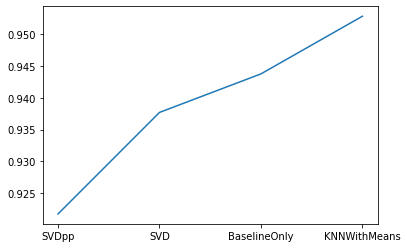

In [30]:
names = np.array(names)
results = np.array(results)

index = np.argsort(results)
plt.plot(names[index], results[index])
results[index]